# описание

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи.<br>
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».<br> 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.<br> 
В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание данных
**Таблица users (информация о пользователях):**
    
    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

**Таблица calls (информация о звонках):**

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# импорт и загрузка данных

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [47]:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_mess = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

# предварительный просмотр

## df_calls

In [48]:
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


## df_internet

In [49]:
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


## df_mess

In [50]:
df_mess.info()
df_mess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


## df_tariffs

In [51]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## df_users

In [52]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


- пропуски присутстсвуют только в df_users['churn_date'] - тариф еще действовал на момент выгрузки
- можно заменить типы данных для уменьшения нагрузки на память
- в остальном данные пригодны для работы

# Подготовка данных

## замена типов данных и удаление столбцов

In [53]:
# df_calls
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int8')
df_calls['call_date'] = df_calls['call_date'].astype('datetime64')
df_calls['user_id'] = df_calls['user_id'].astype('int16')
df_calls = df_calls.drop('id', 1)

C:\Users\Алексей Савелов\AppData\Local\Temp\ipykernel_11336\1308017100.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_calls = df_calls.drop('id', 1)


In [54]:
# df_internet
df_internet['mb_used'] = df_internet['mb_used'].astype('int32')
df_internet['session_date'] = df_internet['session_date'].astype('datetime64')
df_internet['user_id'] = df_internet['user_id'].astype('int16')
df_internet = df_internet.drop(['Unnamed: 0', 'id'], 1)

C:\Users\Алексей Савелов\AppData\Local\Temp\ipykernel_11336\3988823379.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_internet = df_internet.drop(['Unnamed: 0', 'id'], 1)


In [55]:
# df_mess
df_mess['message_date'] = df_mess['message_date'].astype('datetime64')
df_mess['user_id'] = df_mess['user_id'].astype('int16')
df_mess = df_mess.drop('id',1)

C:\Users\Алексей Савелов\AppData\Local\Temp\ipykernel_11336\1137058989.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mess = df_mess.drop('id',1)


In [56]:
# df_users
df_users['user_id'] = df_users['user_id'].astype('int16')
df_users['age'] = df_users['age'].astype('int8')
df_users['churn_date'] = df_users['churn_date'].fillna('unknown')
df_users['reg_date'] = df_users['reg_date'].astype('datetime64')

- проведена замена типов данных, для экономии ресурсов(в этом проекте можно было и не делать этого, но на больших данных необходимо)
- удалены столбцы 'id', так как в них нет необходимости
- пропуски в df_users['churn_date'] заменены на 'unknown'

## добавление столбцов

In [57]:
df_calls['m'] = df_calls['call_date'].dt.month
df_internet['m'] = df_internet['session_date'].dt.month
df_mess['m'] = df_mess['message_date'].dt.month

- добавлены столбцы с месяцем подключения для группировки

## группировка данных

In [58]:
calls = df_calls.pivot_table(index=['user_id', 'm'], values='duration', aggfunc='sum').reset_index()
calls.head()

,user_id,m,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


In [59]:
internet = df_internet.pivot_table(index=['user_id', 'm'], 
                                   values='mb_used', aggfunc='sum'
                                  ).apply(np.ceil).astype('int16').reset_index()
internet.head()

,user_id,m,mb_used
0,1000,5,2252
1,1000,6,23213
2,1000,7,13988
3,1000,8,14043
4,1000,9,14556


In [60]:
mess = df_mess.pivot_table(index=['user_id', 'm'], values='message_date', aggfunc='count').reset_index()
mess.head()

,user_id,m,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


- данные сгруппированы по 'user_id' и  'm', посчитаны суммы звонков смс и трафика.

## объединяем таблицы

In [61]:
df = calls.merge(internet, on=['user_id', 'm'], how='outer').merge(mess, on=['user_id', 'm'], how='outer')

In [62]:
df = df.merge(df_users[['city', 'user_id', 'tariff']], on='user_id', how='outer')
df = df.rename(columns = {'tariff': 'tariff_name',
                         'message_date': 'message'})

In [63]:
df = df.merge(df_tariffs, on='tariff_name', how='left')

In [64]:
#удаление пропусков и замена мегабайт на округленные гигабайты
df = df.dropna(subset=['duration', 'mb_used'], axis=0)
df['mb_used'] = (df['mb_used'] / 1024).apply(np.ceil).astype('int32')
df['mb_per_month_included'] = (df['mb_per_month_included'] / 1024).astype('int32')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3175
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3163 non-null   int64  
 1   m                      3163 non-null   float64
 2   duration               3163 non-null   float64
 3   mb_used                3163 non-null   int32  
 4   message                2667 non-null   float64
 5   city                   3163 non-null   object 
 6   tariff_name            3163 non-null   object 
 7   messages_included      3163 non-null   int64  
 8   mb_per_month_included  3163 non-null   int32  
 9   minutes_included       3163 non-null   int64  
 10  rub_monthly_fee        3163 non-null   int64  
 11  rub_per_gb             3163 non-null   int64  
 12  rub_per_message        3163 non-null   int64  
 13  rub_per_minute         3163 non-null   int64  
dtypes: float64(3), int32(2), int64(7), object(2)
memory usag

,user_id,m,duration,mb_used,message,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,3,22.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
1,1000,6.0,172.0,23,60.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
2,1000,7.0,340.0,14,75.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
3,1000,8.0,408.0,14,81.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
4,1000,9.0,466.0,15,57.0,Краснодар,ultra,1000,30,3000,1950,150,1,1


объеденили все таблицы в одну общую

## считаем выручку

In [65]:
# функция расчета выручки за месяц
def rev (row):
    price = row['rub_monthly_fee']
    
    call = row['minutes_included'] - row['duration']
    if call < 0:
        price += abs(call) * row['rub_per_minute']
    internet = row['mb_per_month_included'] - row['mb_used'] 
    if internet < 0:
        price += abs(internet) * row['rub_per_gb']
    mess = row['messages_included'] - row['message']   
    if mess < 0:
        price += abs(mess) * row['rub_per_message']
    return price

In [66]:
# добавление данных
df['revenue'] = df.apply(rev, axis=1)

In [67]:
df.head()

,user_id,m,duration,mb_used,message,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.0,159.0,3,22.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
1,1000,6.0,172.0,23,60.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
2,1000,7.0,340.0,14,75.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
3,1000,8.0,408.0,14,81.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
4,1000,9.0,466.0,15,57.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0


добавлен столбец с выручкой по месяцам

# анализ данных

In [68]:
# разбиваем пользователей на 2 таблицы по тарифу

smart = df.query('tariff_name == "smart"')
ultra = df.query('tariff_name == "ultra"')

## среднее, дисперсия, среднее отклонение

In [69]:
# duration
duration = df.pivot_table(index='tariff_name', values='duration', aggfunc=['mean', np.var, np.std]).astype(int)
duration.columns = ['mean','var','std']

In [70]:
# message
message = df.pivot_table(index='tariff_name', values='message', aggfunc=['mean', np.var, np.std]).astype(int)
message.columns = ['mean','var','std']

In [71]:
# internet
internet = df.pivot_table(index='tariff_name', values='mb_used', aggfunc=['mean', np.var, np.std]).astype(int)
internet.columns = ['mean','var','std']

In [72]:
# revenue
revenue = df.pivot_table(index='tariff_name', values='revenue', aggfunc=['mean', np.var, np.std]).astype(int)
revenue.columns = ['mean','var','std']

revenue_sum = df.pivot_table(index='tariff_name', values='revenue', aggfunc=['sum', 'count']).astype(int)
revenue_sum.columns = ['sum','count']

In [73]:
duration

,mean,var,std
tariff_name,,,
smart,419,35798,189
ultra,548,94015,306


In [74]:
message

,mean,var,std
tariff_name,,,
smart,38,718,26
ultra,61,2008,44


In [75]:
internet

,mean,var,std
tariff_name,,,
smart,16,38,6
ultra,13,242,15


In [76]:
revenue_sum

,sum,count
tariff_name,,
smart,2828301,2222
ultra,1842300,941


## графики

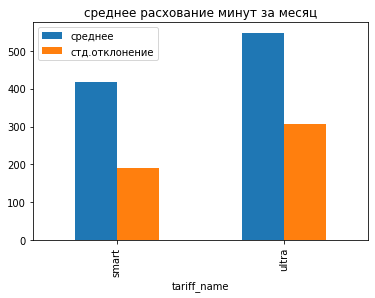

In [77]:
duration[['mean','std']].plot(kind='bar', title='среднее расхование минут за месяц')
plt.legend(['среднее', 'стд.отклонение'])
plt.show()

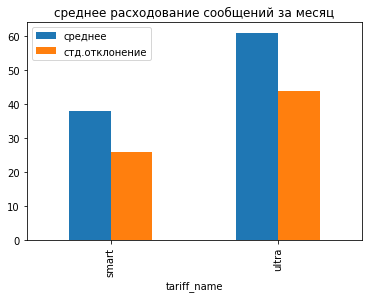

In [78]:
message[['mean','std']].plot( kind='bar', title='среднее расходование сообщений за месяц')
plt.legend(['среднее', 'стд.отклонение'])
plt.show()

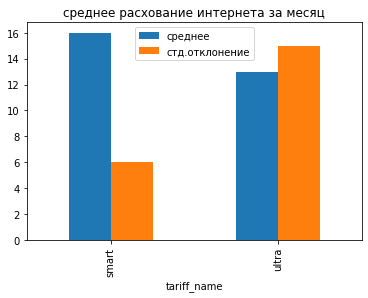

In [79]:
internet[['mean','std']].plot(kind='bar', title='среднее расхование интернета за месяц')
plt.legend(['среднее', 'стд.отклонение'])
plt.show()

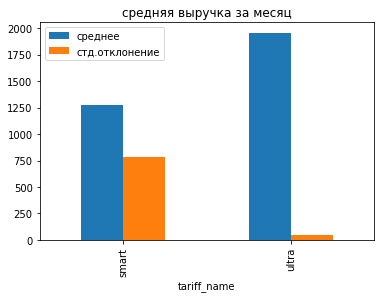

In [80]:
revenue[['mean','std']].plot(kind='bar', title='средняя выручка за месяц')
plt.legend(['среднее', 'стд.отклонение'])
plt.show()

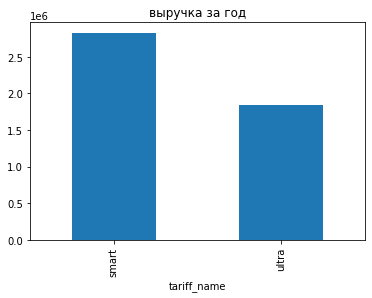

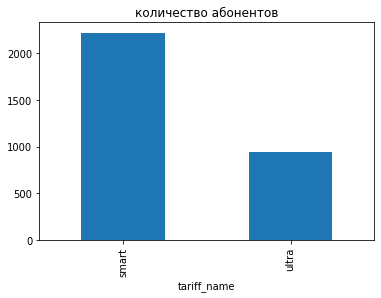

In [81]:
revenue_sum['sum'].plot(kind='bar', title='выручка за год')
plt.show()
revenue_sum['count'].plot(kind='bar', title='количество абонентов')
plt.show()

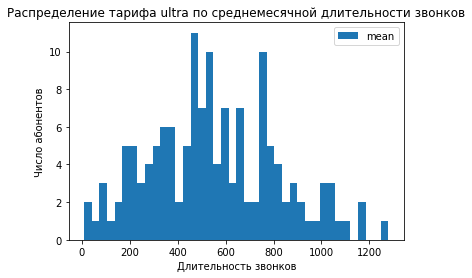

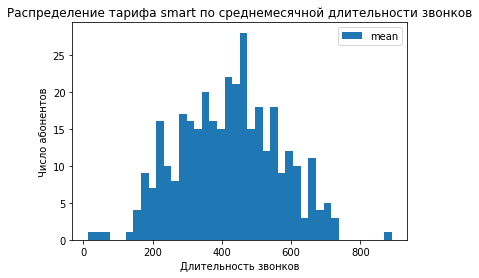

In [82]:
df[df.tariff_name=='ultra'].groupby('user_id'
                                   )['duration'].agg(['mean']
                                                    ).sort_values(by='mean', ascending=False
                                                                 ).plot(kind='hist',bins=40
                                                                       )
plt.title('Распределение тарифа ultra по среднемесячной длительности звонков')
plt.xlabel('Длительность звонков')
plt.ylabel('Число абонентов')

df[df.tariff_name=='smart'].groupby('user_id'
                                   )['duration'].agg(['mean']
                                                    ).sort_values(by='mean', ascending=False
                                                                 ).plot(kind='hist',bins=40
                                                                       )
plt.title('Распределение тарифа smart по среднемесячной длительности звонков')
plt.xlabel('Длительность звонков')
plt.ylabel('Число абонентов')
plt.show()

### количество абонентов разных тарифов

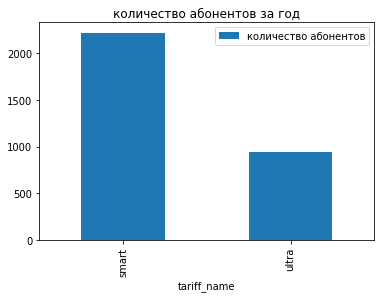

In [83]:
df.groupby('tariff_name').agg({'tariff_name': 'count'}).plot(kind='bar', title='количество абонентов за год')
plt.legend(['количество абонентов'])
plt.show()

### количество пользоватей по городам

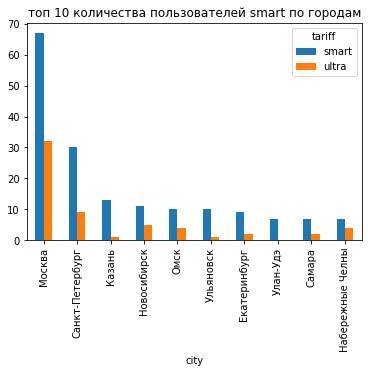

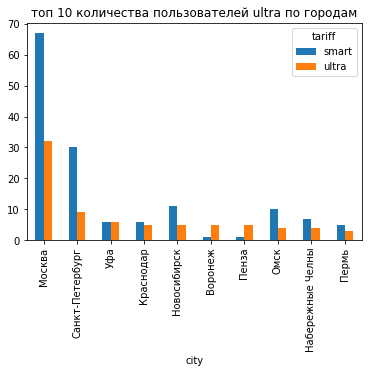

In [84]:
df_users.pivot_table(index='city', columns='tariff', values='user_id', aggfunc='count'
                    ).sort_values(by='smart', ascending=False
                                 ).head(10).plot(kind='bar', title='топ 10 количества пользователей smart по городам')
plt.show()

df_users.pivot_table(index='city', columns='tariff', values='user_id', aggfunc='count'
                    ).sort_values(by='ultra', ascending=False
                                 ).head(10).plot(kind='bar', title='топ 10 количества пользователей ultra по городам')
plt.show()

### средний чек по городам топ 10

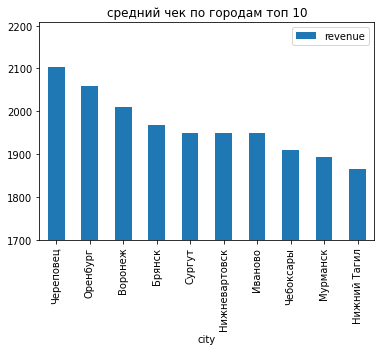

In [85]:
df.pivot_table(index='city', values='revenue', aggfunc='mean'
              ).sort_values(by='revenue', ascending=False
                           ).head(10).plot(kind='bar', title='средний чек по городам топ 10')
plt.ylim(1700,)
plt.show()

# Гипотезы

## выручка от пользователей тарифов «Ультра» и «Смарт» равны

Н0: **средняя выручка тарифов равна**

Н1: средняя выручка по тарифам не равна

In [86]:
alpha = 0.05
results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.517687449727398e-278
Отвергаем нулевую гипотезу


тест подтверждает что выручка не равна.

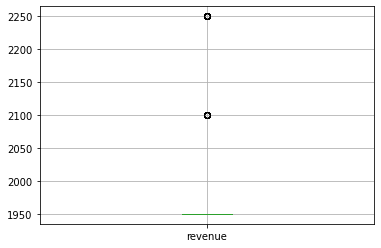

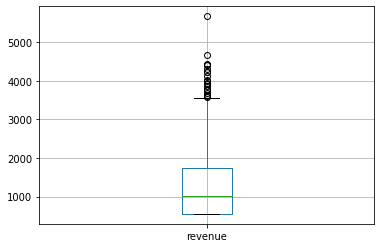

In [87]:
ultra.boxplot(column='revenue')
plt.show()
smart.boxplot(column='revenue')
plt.show()

## выручка по регионам равна

In [88]:
moscow = df[df['city'] == 'Москва']
region = df[~(df['city'] == 'Москва')]

In [89]:
alpha = 0.05
results = st.ttest_ind(region['revenue'], moscow['revenue'],equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4460858778892436
Не получилось отвергнуть нулевую гипотезу


тест не позволил отклонить нулевую гипотезу. Это говорит о том что выручка примерно равна. При ручной проверке это подтверждается.

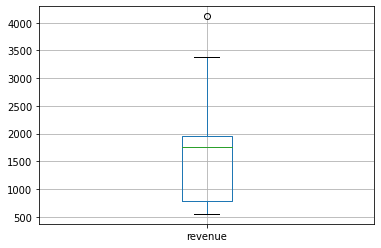

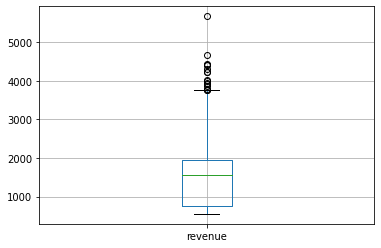

In [90]:
moscow.boxplot(column='revenue')
plt.show()
region.boxplot(column='revenue')
plt.show()

# общий вывод

**из проведенного анализа видно:**
- в среднем пользователям хватает минут в рамках тарифа
- некоторое количество пользователей тарифа смарт выходят за рамки предоставленных минут оплачивая услуги дополнительно, пользователи тарифа смарт укладываются в лимит
- с использованием сообщений ситуация похожая
- интернета в ключенного в тариф пользователям смарт не хватает
- средняя выручка от пользователей смарт в среднем 1250, но у нее большой уроветь стандартного отклонения и она не стабильна.
- выручка тарифа ультра на уровне 2000, с незначительным уровнем отклонения говорит о том что этому среднему можно доверять
- выручка за год от абонентов смарт выше выручки ультра, за счет бОльшего количества пользователей. 
- если посмотреть соотношение выручка/количество пользователей то выручка от тарифа ультра выше более чем в 2 раза.
- выручка от пользователей ультра и смарт не равна
- выручка от пользователей из Москвы равна выручке пользователей из регионов, за счет большего среднего и медианного чека в Москве.